### 残差网络（ResNet）

In [29]:
import time 
import torch
from torch import nn,optim
import  torch.nn.functional as F
from d2l import torch as d2l
import sys

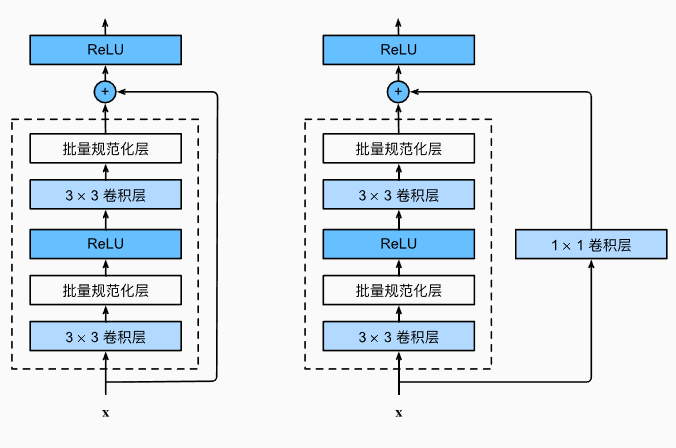

In [23]:
#残差块
class Residual(nn.Module):
    def __init__(self,in_channals,out_channals,use_1x1conv=False,stride=1):#是否引入一个额外的1×1卷积层来将输入变换成需要的形状后再做相加运算
       super(Residual,self) .__init__()
       self.conv1=nn.Conv2d(in_channals,out_channals,kernel_size=3,padding=1,stride=stride)
       self.conv2=nn.Conv2d(in_channals,out_channals,kernel_size=3,padding=1)
       if use_1x1conv:
            self.conv3=nn.Conv2d(in_channals,out_channals,kernel_size=1,stride=stride)
       else:
            self.conv3=None
        
       self.bn1=nn.BatchNorm2d(out_channals)
       self.bn2=nn.BatchNorm2d(out_channals)
    
    #前向传播
    def forward(self,X):
        Y=F.relu(self.bn1(self.conv1(X)))
        Y=self.bn2(self.conv2(Y))
        if self.conv3:
            X=self.conv3(X)
        
        return F.relu(X+Y)

#### RestNet-18模型

In [31]:
net=nn.Sequential(
    nn.Conv2d(1,64,7,2,3),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(3,2,1)
)

def resnet_block(in_channals,out_channals,num_residuals,first_block=False):
    """
    第一个模块的通道数同输入通道数一致。由于之前已经使用了步幅为2的最大池化层，
    所以无须减小高和宽。之后的每个模块在第一个残差块里将上一个模块的通道数翻倍，并将高和宽减半
    """
    if first_block:
         assert in_channals==out_channals
    blk=[]
    for i in range(num_residuals):
         if i ==0 and not first_block:
             blk.append(Residual(in_channals,out_channals,use_1x1conv=True,stride=2))
         else:
              blk.append(Residual(in_channals,out_channals))
    return nn.Sequential(*blk)

#每个模块使用两个残差块
net.add_module('resnet_block1',resnet_block(64,64,2,first_block=True))
net.add_module('resnet_block2',resnet_block(64,128,2))
net.add_module('resnet_block3',resnet_block(128,256,2))
net.add_module('resnet_block4',resnet_block(256,512,2))
net.add_module('global_avg_pool',d2l.GlobalAvgPool2d())
net.add_module('fc',nn.Sequential(d2l.FlattenLayer().nn.Linear(512,10)))

AttributeError: module 'd2l.torch' has no attribute 'GlobalAvgPool2d'